In [34]:
# Importing all the important libraries

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             roc_auc_score, roc_curve)

In [36]:
df = pd.read_csv('water_leak_detection.csv')

In [37]:
df.head()

,Timestamp,Sensor_ID,Pressure (bar),Flow Rate (L/s),Temperature (°C),Leak Status,Burst Status
0,2024-01-01 00:00:00,S007,3.694814,77.515218,21.695365,0,0
1,2024-01-01 00:05:00,S007,2.587125,179.926422,19.016725,0,0
2,2024-01-01 00:10:00,S002,2.448965,210.130823,10.011681,1,0
3,2024-01-01 00:15:00,S009,2.936844,141.777934,12.092408,0,0
4,2024-01-01 00:20:00,S003,3.073693,197.484633,17.001443,0,0


In [38]:
df.tail()

,Timestamp,Sensor_ID,Pressure (bar),Flow Rate (L/s),Temperature (°C),Leak Status,Burst Status
995,2024-01-04 10:55:00,S007,2.949811,55.160481,19.523946,0,0
996,2024-01-04 11:00:00,S010,3.836533,172.041322,20.724292,0,0
997,2024-01-04 11:05:00,S002,2.716468,64.033911,10.250073,0,0
998,2024-01-04 11:10:00,S002,3.017897,75.913513,19.329712,0,0
999,2024-01-04 11:15:00,S003,3.777372,179.568443,16.101606,0,0


In [39]:
df.describe()

,Pressure (bar),Flow Rate (L/s),Temperature (°C),Leak Status,Burst Status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.220696,125.038082,17.434794,0.019000,0.010000
std,0.488997,44.121419,4.288908,0.136593,0.099549
min,0.910977,50.654490,10.002020,0.000000,0.000000
25%,2.859332,87.946866,13.715323,0.000000,0.000000
50%,3.265711,124.106896,17.330067,0.000000,0.000000
75%,3.607196,162.086708,20.922839,0.000000,0.000000
max,3.995364,331.754081,24.966107,1.000000,1.000000


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timestamp         1000 non-null   object 
 1   Sensor_ID         1000 non-null   object 
 2   Pressure (bar)    1000 non-null   float64
 3   Flow Rate (L/s)   1000 non-null   float64
 4   Temperature (°C)  1000 non-null   float64
 5   Leak Status       1000 non-null   int64  
 6   Burst Status      1000 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [41]:
df.shape

(1000, 7)

In [42]:
df.isnull().sum()

Timestamp           0
Sensor_ID           0
Pressure (bar)      0
Flow Rate (L/s)     0
Temperature (°C)    0
Leak Status         0
Burst Status        0
dtype: int64

In [43]:
print(df["Leak Status"].value_counts())

Leak Status
0    981
1     19
Name: count, dtype: int64


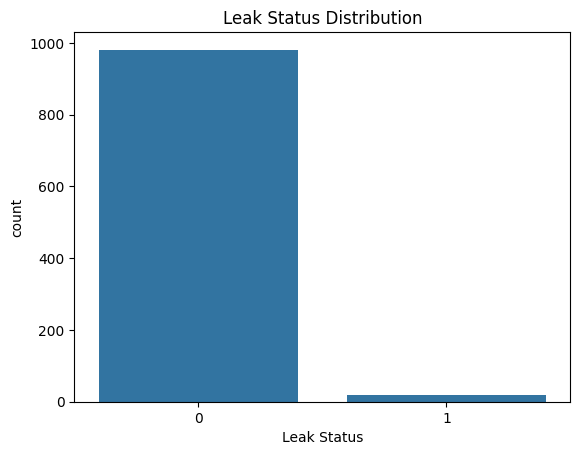

In [44]:
sns.countplot(x="Leak Status", data=df)
plt.title("Leak Status Distribution")
plt.show()

In [45]:
X = df[['Pressure (bar)', 'Flow Rate (L/s)',
       'Temperature (°C)']]
y = df['Leak Status']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [47]:
# Use StandardScaler to scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42)
}

# Dictionary to store results
results = {}

# Train, evaluate, and compare models
for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store results
    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "roc_auc_score": roc_auc
    }

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"ROC AUC Score: {roc_auc:.4f}")

# Compare and select the best model
print("\n--- Model Comparison Summary ---")
for name, metrics in results.items():
    print(f"\nModel: {name}")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"ROC AUC Score: {metrics['roc_auc_score']:.4f}")

# Determine the best model based on ROC AUC score
best_model_name = max(results, key=lambda k: results[k]['roc_auc_score'])
print(f"\nThe best performing model is: {best_model_name}")


--- Training Logistic Regression ---
Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       199
           1       0.00      0.00      0.00         1

    accuracy                           0.99       200
   macro avg       0.50      0.50      0.50       200
weighted avg       0.99      0.99      0.99       200

Confusion Matrix:
[[198   1]
 [  1   0]]
ROC AUC Score: 0.9899

--- Training Decision Tree Classifier ---
Accuracy: 0.9900
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       199
           1       0.33      1.00      0.50         1

    accuracy                           0.99       200
   macro avg       0.67      0.99      0.75       200
weighted avg       1.00      0.99      0.99       200

Confusion Matrix:
[[197   2]
 [  0   1]]
ROC AUC Score: 0.9950

--- Training Random Forest Classifier ---
Accuracy: 0.9900

In [49]:
import pandas as pd

def predict_leak():
    print("\nPlease enter the following sensor readings to predict leak status:")
    
    # Get user input for each feature
    new_pressure = float(input("Enter Pressure (bar): "))
    new_flow_rate = float(input("Enter Flow Rate (L/s): "))
    new_temp = float(input("Enter Temperature (°C): "))

    input_data = pd.DataFrame([[new_pressure, new_flow_rate, new_temp]],
                              columns=['Pressure (bar)', 'Flow Rate (L/s)', 'Temperature (°C)'])

    best_model_name = max(results, key=lambda k: results[k]['roc_auc_score'])
    best_model = models[best_model_name]

    input_data_scaled = scaler.transform(input_data)
    prediction = best_model.predict(input_data_scaled)
    print("\nPrediction Result:")
    if prediction[0] == 1:
        print("Leak Detected! 🚨")
    else:
        print("No Leak Detected ✅")

predict_leak()


Please enter the following sensor readings to predict leak status:

Prediction Result:
No Leak Detected ✅


In [50]:
import joblib

# Get the best model object from the models dictionary
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name.replace(' ', '_').lower()}_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(f"Best model ({best_model_name}) and scaler saved successfully! ✅")

Best model (Decision Tree Classifier) and scaler saved successfully! ✅
